# Gillespie's Stochastic Simulation Algorithm

As we saw at lesson the SSA algorithm is used to simulate stochastic processes like reactions, we saw that when a system is not stochastic the reaction comes to an equilibrium and the system get's to a steady state what will happen with a stochastic system?


## Foundations of SSA

Given $m$ reactions $R_1, R_2, \dots, R_m$ and some molecules (or genes as we saw at lesson) $S_1, S_2, \dots, S_n$ we can write the notion of state as a vector on $n$ states $(X_1, X_2, \dots, X_n)$.

- When will the next reaction occur?
- Which reaction will occur?

So now we introduce the notion of propensity function $\alpha_i$ for each reaction $R_i$.
And we defien a probability distribution $P(\tau, \mu)$, where $\tau$ is the time interval we're considering from $t$ to $t + \tau$ and $R_\mu$ is the reaction that will occur.

We can call $c_\mu$ our constant that determines the rate of reactions. Let's define $\alpha_\mu$ as the $\color{red}{\text{propensity}}$ of the system, that is the sum of all the propensities of the reactions.

$$
\alpha_\mu = h_\mu c_\mu
$$

where $h_\mu$ is the number of molecules that can react : *Reactants*

So $R_\mu$ will be $l_1S_1 + ... + l_nS_n \rightarrow^c p_1S_1 + ... + p_nS_n$
Such that:

$$
h_\mu = \prod_{i=1}^n \binom{X_i}{l_i}
$$


## Where propensity is used?

So given a reaction set with certain propensities, we will use this as a parameter of an exponential distribution modelling the time between events occurrences. Remember that the exponential distribution is defined as:


CDF:

$$
F(x;\lambda) = 1 - e^{-\lambda x}
$$

And PDF:

$$
f(x) =
\begin{cases}
\lambda e^{-{\lambda}x} \;\;\;  x \geq 0 \\
0 \;\;\; otherwise
\end{cases}

$$

### An important point

What we must remember is that this distribution is memoryless and if we consider a set of RV, their min $(X_{set})$ is exponentially distributed

- Memoryless: $F(x;\lambda) = F(x + y;\lambda) = F(y;\lambda)$
- Min($X_{set}$) is exponentially distributed: $X = min(X_1, X_2, ..., X_n)$, then $X$ is exponentially distributed.

## The algorithm

We represent the state of simulation with a vector the multiset of molecules in the system: $[X_1,...,X_n]$. A real variable $t$ that is our time initially at 0.

The algorithm iterates as follows until $t$ reaches a certain value $t_{max}$:

1. The time $t+\tau$ so the time in which the next reaction will occur is given by the exponential distribution with parameter $\alpha_0 = \sum_{i=1}^m \alpha_i$.
2. The reaction $R_\mu$ that will occur at the time $t+\tau$ is chosen randomly with probability $\frac{\alpha_\mu}{\sum \alpha_i}$. This is $\frac{\alpha_\mu}{\alpha_0}$. This is the probability of the reaction to occur. 

At each step $t$ is incremented by $\tau$ and the state of the system is updated according to the reaction $R_\mu$ that occurred.

In [7]:

# In this program we will see how a negative feedback loop can be modeled using the Gillespie algorithm

# Our negative feedback loop will be formed by Genes (G1,G2,G3) and Proteins (P1,P2,P3) 
# such that proteins are inhibitory to the genes and genes are inhibitory to the proteins


import numpy as np
import matplotlib.pyplot as plt
import random

In [8]:
# We will define the following parameters: these first all all our reaction with rate

# g1 rate of occurence g1,p1 is 10
# g2 rate of occurrence g2,p2 is 10000
# g3 rate of occurrence g3,p3 is 10
g1_production_rate = 10
g2_production_rate = 10000
g3_production_rate = 10

# when p1 binds to g2 there is a two way reaction :
# g2 + p1 -> g2p1 (molecule) the rate of occurrence is 10, and g2p1 -> g2 + p1 is 2
p1_binding_to_g2_rate = 10
p1_unbinding_from_g2_rate = 2
# when p2 binds to g3 there is a two way reaction :
# g3 + p2 -> g3p2 (molecule) the rate of occurrence is 0.1, and g3p2 -> g3 + p2 is 20
p2_binding_to_g3_rate = 0.1
p2_unbinding_from_g3_rate = 20
# when p3 binds to g1 there is a two way reaction :
# g1 + p3 -> g1p3 (molecule) the rate of occurrence is 10, and g1p3 -> g1 + p3 is 20
p3_binding_to_g1_rate = 10
p3_unbinding_from_g1_rate = 20

# Finally the rate of decay (protein denaturation we can say) of proteins is respectively :
# p1 rate of decay is 1
p1_decay_rate = 1
# p2 rate of decay is 100
p2_decay_rate = 100
# p3 rate of decay is 1
p3_decay_rate = 1


# Initial conditions
p1 = 0
p2 = 0
p3 = 0

g1 = 1
g2 = 1
g3 = 1

#So initial state is G = (1,1,1) and P = (0,0,0), t=0

# Let's try a smaller reaction first

We have Y1 and Y2 

Y1 with a rate of 10 becomes 2Y1

$$
Y_1 \mapsto^{10} 2Y_1
$$

Y1+Y2 witha a rate of 0.01 becomes 2Y2

$$
Y_1 + Y_2 \mapsto^{0.01} 2Y_2
$$

and Y2 with a rate of 10 becomes Z

$$
Y_2 \mapsto^{10} Z
$$


3 reactions, 3 molecules.

In [9]:
y1_production_rate = 10 # Rate of occurrence of this reaction
y2y1_production_rate = 0.01 # Rate of occurrence of this reaction
y2z_production_rate = 10 # Rate of occurrence of this reaction

initial_state_simple = [1000,999,0]

number_of_reactions = 3

To compute the decrease in reactants after a reaction takes place, you need to know the stoichiometry of the reaction. Stoichiometry describes the relative amounts of reactants and products involved in a chemical reaction.

For example, let's consider the reaction:

$$
A + B \mapsto C
$$

The stoichiometry of this reaction tells us that one molecule of A and one molecule of B react to produce one molecule of C. Therefore, after this reaction takes place, the number of A and B molecules in the system will both decrease by 1, while the number of C molecules will increase by 1.

In general, for a reaction with stoichiometry:

$$
aA + bB \mapsto cC + dD + ...
$$

the decrease in the number of reactant i (i.e., A or B in the example above) after the reaction takes place can be calculated as:
$$
\Delta n_i = -ai * νi
$$
where ai is the rate at which the reaction occurs (i.e., the propensity), and νi is the stoichiometric coefficient of reactant i in the reaction.

For example, in the Lotka-Volterra model:

$$
X + Y \mapsto 2Y \\
Y \mapsto Z
$$

the decrease in X and Y after the first reaction takes place can be calculated as:

$$
\Delta nX = -a_1 * νX = -10 * 1 = -10 \\
\Delta nY = -a_1 * νY = -10 * 1 = -10
$$


Here, νX and νY are both equal to 1 because both X and Y have a stoichiometric coefficient of 1 in the first reaction. After the second reaction takes place, the decrease in Y and the increase in Z can be calculated as:

$$
\Delta nY = -a3 * νY = -10 * 1 = -10 \\
\Delta nZ = a3 * νZ = 10 * 1 = 10
$$

Here, νY is 1 and νZ is 1, since Y has a stoichiometric coefficient of 1 in the second reaction, and Z has a stoichiometric coefficient of 1 as a product of the second reaction.

In [10]:
# propensities for specific reaction is
def y1_production_propensity(state):
    return state[0]*y1_production_rate

def y2y1_production_propensity(state):
    return (state[1]*state[0])*y2y1_production_rate

def y2z_production_propensity(state):
    return state[1]*y2z_production_rate

# a function that model the change in state of the system this must be overridde for each system
def state_update(initial_state, reaction, propensities):
        
    # update the state
    if reaction == 0:
        initial_state[0] = initial_state[0] + 2
    elif reaction == 1:
        # y1+y2 -> 2y2
        initial_state[1] = initial_state[1] + 2
        # and y1,y2 are consumed
        initial_state[0] -= 1
        initial_state[1] -= 1
    elif reaction == 2:
        # y2 -> z
        initial_state[2] = initial_state[2] + 1
        # and y2 is consumed
        initial_state[1] -= 1
    
    return initial_state[0], initial_state[1], initial_state[2]

In [11]:
def gillespies_SSA_simplified(time_limit, initial_state, propensities_function_lists):
    '''
    propensities: a list of propensities of the reactions
    time_limit: the time limit of the simulation
    initial_state: the initial state of the system.
    
    
    accepts a list of initial propensities and the initial state, and repeat the two step of SSA on that 
    return the evolution of the system
    '''
    
    results = []
    update = (0,0,0)
    t = 0
    total_propensity = 0
    tau = 0
    reaction_index = -1
    total_steps = 0
    reaction_taken = (0,0,0)

    # First step: calculate propensity
    #for t in range(0, time_limit):
    while t < time_limit:
        
        propensities = [propensities_func(initial_state) for propensities_func in propensities_func_list]      
    
        # Set timestep
        total_propensity = sum(propensities)
        
        # Determine the jump
        # generate tau exponentially distributed, where the average is 1/total_propensity
        
        r1= np.random.uniform(0,1)
         
        # Multiply by 100 to get the time in seconds
        
        tau = (1/total_propensity) * np.log(1/r1) * (100)
    
        t = t + tau
        total_steps = total_steps + 1

        # Determine the reaction
        # we should have for each of the reaction a_mu / a0 probability of being chosen
        
        # generate N a uniformly distributed number in [0 to a0], Choosing reaction R_\mu with probability a_\mu / a0.
        # we start summing a_i, and if the sum is greater than N, we choose the reaction i

        N = np.random.uniform(0,1) * total_propensity
    
        #print("Current randomly generated number for reaction is ", N)
        
        #for propensity, i in zip(propensities, range(0, len(propensities))):
        #    print("Propensity for reaction ", i, " is ", propensity)

        # The idea now is start summing a_i until the sum is greater than N the number of iteration is the reaction index        
        for i in range(0, len(propensities)):
            N = N - propensities[i]
            if N < 0:
                reaction_index = i
                break
                
        # Update the state
        update = state_update(initial_state, reaction_index, propensities)
        
        # Save the state
        results.append(update)
        
        #print("Current state", initial_state)
        
    
    return results, total_steps 

In [12]:
def plot_results(results):
   
    # plot in time the evolution of initial_state[0], initial_state[1], initial_state[2]
    plt.plot(results)

    plt.show()

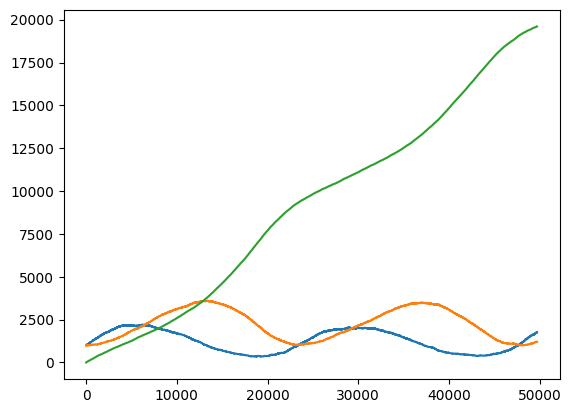

In [13]:

propensities_func_list = [y1_production_propensity, y2y1_production_propensity, y2z_production_propensity]

results, total_steps = gillespies_SSA_simplified(initial_state = initial_state_simple,
                                                 propensities_function_lists= propensities_func_list, time_limit = 100) 

#print("Total steps", total_steps)
#print("Total reactions taken", reaction_taken)
#print(results)

plot_results(results)